# **Méthode Random Forest:**

La méthode [Random Forest](https://www.journaldunet.fr/web-tech/guide-de-l-intelligence-artificielle/1501905-random-forest-ou-foret-aleatoire/)
est composée de plusieurs arbres de décision, entrainés de manière indépendante sur des sous-ensembles du data set d'apprentissage (méthode de bagging). Chacun produit une estimation, et c'est la combinaison des résultats qui va donner la prédiction finale qui se traduit par une variance réduite. 

Sommaire :     

1.[Import des jeux de données](#Imports)

2.[Randomized SearchCV](#CV)

3.[Recherche des meilleurs hyperparamètres](#hp)

4.[Utilisation des meilleurs hyperparamètres](#up)

<a name="Imports"></a>
## **Import des jeux de données**  

In [ ]:
from ast import literal_eval 

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

import statistics
import re
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
datasNR = pd.read_csv('/content/drive/MyDrive/datasNR.csv',sep='\t')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/X_trainlog.csv',sep='\t')
X_test = pd.read_csv('/content/drive/MyDrive/X_testlog.csv',sep='\t')

In [ ]:
Y_train = pd.read_csv('/content/drive/MyDrive/Y_trainlog.csv',sep='\t')
Y_test = pd.read_csv('/content/drive/MyDrive/Y_testlog.csv',sep='\t')

MetCO2=pd.read_csv('/content/drive/MyDrive/MetC02_RegRidge.csv',sep='\t')
MetEn=pd.read_csv('/content/drive/MyDrive/MetEn_RegRidge.csv',sep='\t')


In [ ]:
for col in X_train:
  mean_value= X_train[col].mean() 
  
  X_train[col].fillna(value=mean_value, inplace=True) 
  
for col in X_test:
  mean_value= X_train[col].mean() 
  
  X_test[col].fillna(value=mean_value, inplace=True) 


In [ ]:
display(Y_test)

,Unnamed: 0,TotalGHGEmissions,SiteEnergyUse(kBtu)
0,552,4.711600,15.078136
1,669,3.840957,14.277643
2,735,1.697449,11.887717
3,407,4.674323,14.752005
4,177,4.222298,15.426428
...,...,...,...
309,1314,4.008423,14.014249
310,1515,3.193763,15.067478
311,1194,2.859340,13.817473
312,1089,5.183748,15.574193


<a name="CV"></a>
## **Randomized SearchCV** :     



On va ici mettre en place l'algorithme en utilisant des paramètres aléatoires pour voir les performances que l'on pourrait obtenir.

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, Y_train['TotalGHGEmissions'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

<a name="hp"></a>
## **Recherche des meilleurs hyperparamètres**      

On va effectuer ici la recherche des meilleurs hyperparamètres pour obtenir les meilleures performances possibles.

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')
#todo : justifier temps de calcul et expliquer, voir si on peut passer les best parameters en entrée pour éviter les copier coller

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



<a name="up"></a>
## **Utilisation des meilleurs hyperparamètres**   

Avec nos hyperparamètres on observe que nos métriques ont les meilleurs résultats parmi toutes nos méthodes jusqu'à présent. On peut donc potentiellement dire que la méthode Random Forest est la plus optimale pour notre projet.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import timeit 
start_time=timeit.default_timer()
from sklearn.metrics import r2_score


In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 90, bootstrap=True) 
randmf.fit( X_train, Y_train['TotalGHGEmissions']) 
rm=randmf

In [ ]:
Y_pred = rm.predict(X_test)
MSE_rm=mean_squared_error(Y_test['TotalGHGEmissions'],Y_pred)
print('NotY_pred = rm.predict(X_test)re MSE est égal à %0.2f' %MSE_rm)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE= mean_absolute_percentage_error(Y_test['TotalGHGEmissions'], Y_pred) * 100

print('MAPE :' ,round(MAPE,2), '%')
# Evaluation du training set

rmtime= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(rmtime,2))   
rmse_rm = (np.sqrt(mean_squared_error(Y_test['TotalGHGEmissions'], Y_pred)))
r2_rm= r2_score(Y_test['TotalGHGEmissions'], Y_pred)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_rm))
print('le score R2 coeff de determination est de %0.2f' %(r2_rm))
#print('\n')
print('MSE Train Score :', round(rm.score(X_train,Y_train['TotalGHGEmissions'])),2)
print('MSE Test Score :',round(rm.score(X_test,Y_test['TotalGHGEmissions'])),2)

NotY_pred = rm.predict(X_test)re MSE est égal à 0.06
MAPE : 9.1 %
Voici le temps de calcul en ms 0.48
RMSE est 0.24677030751830878
le score R2 coeff de determination est de 0.98
MSE Train Score : 1 2
MSE Test Score : 1 2


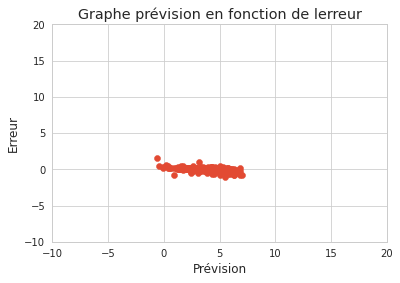

In [ ]:
erreur=Y_pred-Y_test['TotalGHGEmissions'] #erreur de prédiction 
plt.figure()
plt.scatter(Y_pred,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()

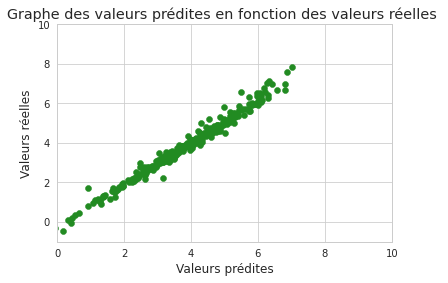

In [ ]:
plt.figure()
plt.scatter(Y_pred,Y_test['TotalGHGEmissions'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(0,10)
plt.ylim(-1,10)
plt.show()

In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 90, bootstrap=True) 
randmf.fit( X_train, Y_train['SiteEnergyUse(kBtu)']) 
rm=randmf

In [ ]:
SEU_pred = rm.predict(X_test)
MSE_rm_bis=mean_squared_error(Y_test['SiteEnergyUse(kBtu)'],SEU_pred)
print('NotY_pred = rm.predict(X_test)re MSE est égal à %0.2f' %MSE_rm_bis)
#mae = mean_absolute_error(y_test, y_predi)
#print('MAE: %.3f' % mae)
MAPE= mean_absolute_percentage_error(Y_test['SiteEnergyUse(kBtu)'], SEU_pred) * 100

print('MAPE :' ,round(MAPE,2), '%')
# Evaluation du training set

rmtime_bis= timeit.default_timer()-start_time
print('Voici le temps de calcul en ms',round(rmtime_bis,2))   
rmse_rm = (np.sqrt(mean_squared_error(Y_test['SiteEnergyUse(kBtu)'], SEU_pred)))
r2_rm_bis= r2_score(Y_test['SiteEnergyUse(kBtu)'], SEU_pred)
#print('La performance du modèle sur la base dapprentissage')
#print('--------------------------------------')
print('RMSE est {}'.format(rmse_rm))
print('le score R2 coeff de determination est de %0.2f' %(r2_rm_bis))
#print('\n')
print('MSE Train Score :', round(rm.score(X_train,Y_train['SiteEnergyUse(kBtu)']),2))
print('MSE Test Score :', round(rm.score(X_test,Y_test['SiteEnergyUse(kBtu)']),2))

NotY_pred = rm.predict(X_test)re MSE est égal à 0.03
MAPE : 0.57 %
Voici le temps de calcul en ms 1.58
RMSE est 0.16251434392625982
le score R2 coeff de determination est de 0.99
MSE Train Score : 1.0
MSE Test Score : 0.99


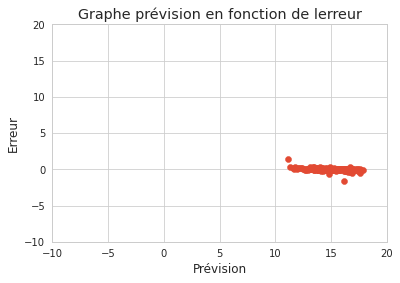

In [ ]:
erreur=SEU_pred-Y_test['SiteEnergyUse(kBtu)'] #erreur de prédiction 
plt.figure()
plt.scatter(SEU_pred,erreur)
plt.xlabel('Prévision')
plt.ylabel('Erreur')
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.title('Graphe prévision en fonction de lerreur')
plt.show()

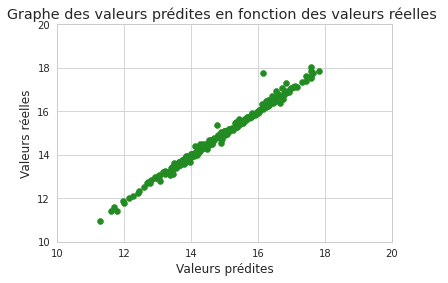

In [ ]:
plt.figure()
plt.scatter(SEU_pred,Y_test['SiteEnergyUse(kBtu)'],c='forestgreen')

plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Graphe des valeurs prédites en fonction des valeurs réelles ')
plt.xlim(10,20)
plt.ylim(10,20)
plt.show()

In [ ]:
feature_scores = pd.Series(rm.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores


SiteEnergyUseWN(kBtu)              0.245784
Electricity(kWh)                   0.183291
PropertyGFABuilding(s)             0.086284
SourceEUI(kBtu/sf)                 0.081675
LargestPropertyUseTypeGFA          0.069893
SiteEUI(kBtu/sf)                   0.066960
PropertyGFATotal                   0.066251
SourceEUIWN(kBtu/sf)               0.049244
SiteEUIWN(kBtu/sf)                 0.037543
GHGEmissionsIntensity              0.023970
NaturalGas(therms)                 0.019065
PrimaryPropertyType                0.018898
SecondLargestPropertyUseTypeGFA    0.016735
LargestPropertyUseType             0.007017
NumberofFloors                     0.006487
Unnamed: 0                         0.005340
PropertyGFAParking                 0.003129
ListOfAllPropertyUseTypes          0.002960
SecondLargestPropertyUseType       0.002326
YearBuilt                          0.001617
Longitude                          0.001385
Latitude                           0.001343
Neighborhood                    

### Feature importance : 

On va regarder ici les features étant les plus importantes et on observe que la taille des immeubles est le facteur le plus important sur les émissions de gaz et la consommation d'énergie.

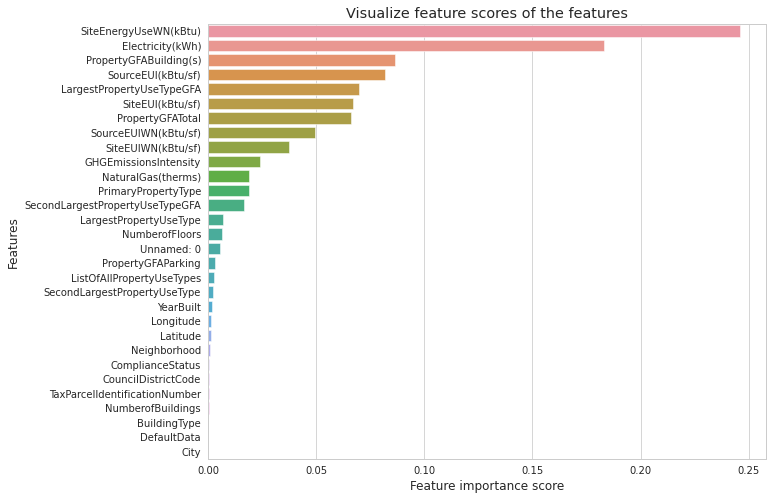

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

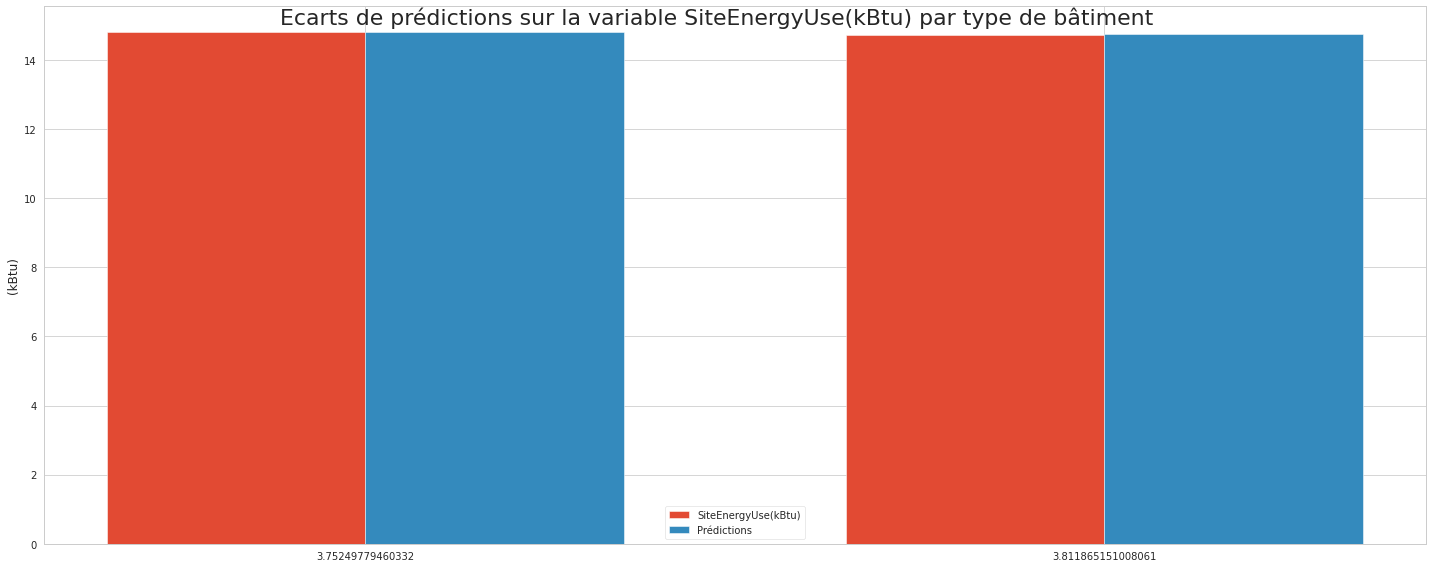

In [ ]:
final_SEU_test = pd.concat([X_test,Y_test],axis=1)
final_SEU_test['SEU_pred'] = SEU_pred
compare_final_SEU_test = final_SEU_test = final_SEU_test.groupby(by='BuildingType').mean()
x = np.arange(len(compare_final_SEU_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8), sharey=False, sharex=False)

scores1 = ax.bar(x - width/2, compare_final_SEU_test['SiteEnergyUse(kBtu)'], width, label='SiteEnergyUse(kBtu)')
scores2 = ax.bar(x + width/2, compare_final_SEU_test['SEU_pred'], width, label='Prédictions')
ax.set_ylabel('(kBtu)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_SEU_test.index)
ax.legend()

plt.suptitle("Ecarts de prédictions sur la variable SiteEnergyUse(kBtu) par type de bâtiment", fontsize=22)
fig.tight_layout()

plt.show()

In [ ]:
new_row = {'MSE': MSE_rm, 'R2': r2_rm, 'time': rmtime}
MetCO2 = MetCO2.append(new_row, ignore_index=True)

new_row1 = {'MSE': MSE_rm_bis, 'R2': r2_rm_bis, 'time': rmtime_bis}
MetEn = MetEn.append(new_row, ignore_index=True)





In [ ]:
MetCO2.to_csv("/content/drive/MyDrive/MetC02_RegForest.csv",sep='\t')
MetEn.to_csv("/content/drive/MyDrive/MetEn_RegForest.csv", sep='\t')